<a href="https://colab.research.google.com/github/Tatsuro0726/Scraping/blob/master/Chapter7_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
#顔認識

import cv2
import sys

# 入力ファイルの指定
image_file = './drive/My Drive/Colab Folder/pakutas/photo1.jpg'

# カスケードファイルのパスを指定
cascade_file = './drive/My Drive/Colab Folder/pakutas/haarcascade_frontalface_default.xml'
image = cv2.imread(image_file)
# グレースケールに変換
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 顔認識用特徴量ファイルを読み込む
cascade = cv2.CascadeClassifier(cascade_file)
# 顔認識の実行
face_list = cascade.detectMultiScale(
    image_gs,
    scaleFactor = 1.1,
    minNeighbors=1,
    minSize=(150,150)
)
if len(face_list) > 0:
  # 認識した部分を囲む
  print(face_list)
  color = (0,0,255)
  for face in face_list:
    x,y,w,h = face
    cv2.rectangle(image, (x,y),(x+w,y+h), color, thickness=8)
  # 描画結果をファイルに書き込む
  cv2.imwrite('./drive/My Drive/Colab Folder/pakutas/facedetected-output.jpg', image)
else:
  print('No face')

[[287 216 256 256]]


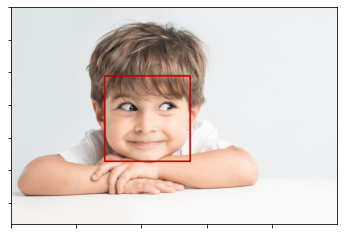

In [ ]:
import io
import numpy as np
import requests
import cv2
from matplotlib import pyplot as plt

# Web上の適当な画像を読み込む
# res = requests.get('https://www.warnerbros.com/sites/default/files/styles/key_art_270x400/public/matrix_keyart.jpg')

# bin_data = io.BytesIO(res.content)
# file_bytes = np.asarray(bytearray(bin_data.read()), dtype=np.uint8)

# img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
image_file = './drive/My Drive/Colab Folder/pakutas/photo1.jpg'
img = cv2.imread(image_file)


# OpenCV上はBGRフォーマットだが、matplotで表示するためにRGBフォーマットに変換する
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 事前にアップロードした分類器ファイルを使用する
cascade = cv2.CascadeClassifier('./drive/My Drive/Colab Folder/pakutas/haarcascade_frontalface_default.xml')

# 分類器で検出
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

# 検出した領域を矩形で囲む
for (x, y, w, h) in face:
  cv2.rectangle(img, (x, y), (x + w, y + h), (200,0,0), 3)

# デフォルトだとグリッドとxy軸ラベルが表示されるので非表示にする
plt.grid(False)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.imshow(img)

In [ ]:
# 顔にモザイクをかける
import cv2, sys, re

# 入力ファイルを指定
if len(sys.argv) <= 1:
  print('no input file')
  quit()
image_file = './drive/My Drive/Colab Folder/pakutas/photo1.jpg'

# 出力ファイル
# output_file = re.sub(r'\,jpg|jpeg|PNG$', '-mosaic.jpg', image_file)
output_file = './drive/My Drive/Colab Folder/pakutas/photo1-mosaic.jpg'
mosaic_rate = 30

# カスケードファイルのパスを指定
cascade_file = './drive/My Drive/Colab Folder/pakutas/haarcascade_frontalface_default.xml'
image = cv2.imread(image_file)
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # グレースケール変換

# 顔認識を実行
cascade = cv2.CascadeClassifier(cascade_file)
face_list = cascade.detectMultiScale(
    image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(100,100)
)
if len(face_list) == 0:
  print('no face')
  quit()

# 認識した部分にモザイクをかける
print(face_list)
color = (0,0,255)
for (x,y,w,h) in face_list:
  # 顔を切り抜く
  face_img = image[y:y+h, x:x+w]
  # 切り抜いた画像を指定倍率で縮小
  face_img = cv2.resize(face_img, (w//mosaic_rate, h//mosaic_rate))
  # 縮小した画像を元のサイズに戻す
  face_img = cv2.resize(face_img, (w,h), interpolation=cv2.INTER_AREA)
  # 元の画像に張り付ける
  image[y:y+h, x:x+w] = face_img

# 描画結果をファイルに書き込む
cv2.imwrite(output_file, image)

[[268 202 304 304]
 [136 445 133 133]]


True

### Chapter7-5: 画像OCR-連続文字認識に挑戦しよう

In [30]:
import sys
import numpy as np
import cv2

# 画像の読み込み
im = cv2.imread('./drive/My Drive/Colab Folder/pakutas/numbers100.png')
# グレースケール変換⇒ぼかして２値化
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.adaptiveThreshold(blur, 255,1,1,11,2)

# 輪郭を抽出
contours = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# 抽出した領域を繰り返し処理する
for cnt in contours:
  x,y,w,h = cv2.boundingRect(cnt)
  if h < 20: continue
  red = (0,0,255)
  cv2.rectangle(im, (x,y), (x+w, y+h), red, 2)

cv2.imwrite('./drive/My Drive/Colab Folder/pakutas/numbers100-cnt.png', im)

True

In [38]:
# 数字認識データを作ろう
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

image_w = 28
image_h = 28
nb_classes = 10

def main():
  # MNISTデータの読み込み
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  # データを正規化
  X_train = X_train.reshape(X_train.shape[0], image_w*image_h).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], image_w*image_h).astype('float32')
  X_train /= 255
  X_test /= 255
  y_train = np_utils.to_categorical(y_train, 10)
  y_test = np_utils.to_categorical(y_test, 10)
  # モデル構築
  model = build_model()
  model.fit(X_train, y_train,
            batch_size=128, epochs=20, verbose=1,
            validation_data=(X_test, y_test))
  # モデルを保存
  model.save_weights('./drive/My Drive/Colab Folder/mnist/mnist.hdf5')
  # モデルの評価
  score = model.evaluate(X_test, y_test, verbose=0)
  print('score=',score)

def build_model():
  # MLPモデルを構築
  model = Sequential()
  model.add(Dense(512, input_shape=(784,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])
  return model

In [39]:
main()

Epoch 1/20
469/469 [==============================] - 8s 18ms/step - loss: 0.2462 - accuracy: 0.9243 - val_loss: 0.1098 - val_accuracy: 0.9663
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1017 - accuracy: 0.9696 - val_loss: 0.0901 - val_accuracy: 0.9722
Epoch 3/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0758 - accuracy: 0.9769 - val_loss: 0.0909 - val_accuracy: 0.9733
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0609 - accuracy: 0.9819 - val_loss: 0.0713 - val_accuracy: 0.9794
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0743 - val_accuracy: 0.9811
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0441 - accuracy: 0.9868 - val_loss: 0.0724 - val_accuracy: 0.9810
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0745 - val_accuracy: 0.9828